#### A quick introduction to Decision Trees using Python

### Import Packages

In [1]:
# data processing
import numpy as np
import pandas as pd

# modeling
from sklearn import tree

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

### Read and Plot Data

In [2]:
# let's simulate some data for this exercise

def simulate_linreg_data(rows):
    # set-up
    n_samples = rows
    np.random.seed(314)

    def true_fun(X):
        return -np.sin(2.2 * np.pi * X)

    # generate data
    x = np.sort(np.random.rand(n_samples))

    y = true_fun(x) + np.random.randn(n_samples) * 0.1
    
    return pd.DataFrame({'x': x, 'y': y})

df = simulate_linreg_data(20)

df.shape

print(df.head())

          x         y
0  0.069914 -0.346400
1  0.122291 -0.636178
2  0.260480 -1.160382
3  0.260757 -1.036982
4  0.261531 -1.048191


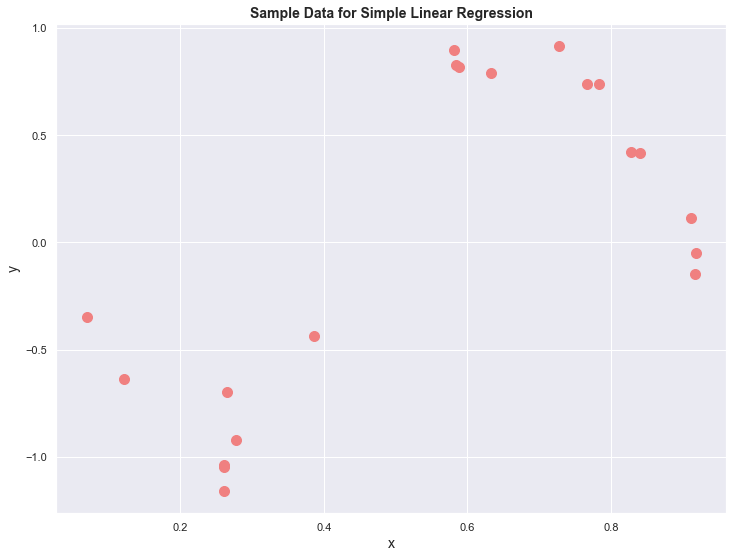

In [3]:
sns.set(style='darkgrid')

plt.figure().set_size_inches(12, 9)

plt.scatter(df.x, df.y, color='lightcoral', s=100)

plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('Sample Data for Simple Linear Regression', fontsize=14, weight='semibold');

## Decision Tree

Step 1: Create a decision tree object.

In [4]:
# max depth
max_d = 3

dtree = tree.DecisionTreeRegressor(max_leaf_nodes=max_d, random_state=314)

Step 2: Fit the model.

In [5]:
dtree.fit(df.x[:, np.newaxis], df.y)

DecisionTreeRegressor(max_leaf_nodes=3, random_state=314)

Step 3: Make predictions.

In [6]:
df['y_hat'] = dtree.predict(df.x[:, np.newaxis])

Plot the original data points and the predictions.

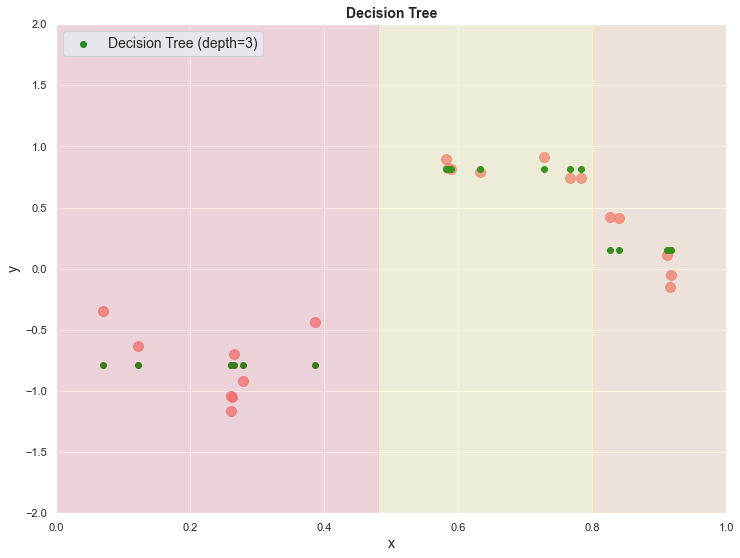

In [7]:
sns.set(style='darkgrid')
plt.figure().set_size_inches(12, 9)

plt.scatter(df.x, df.y, color='lightcoral', s=100, alpha=.8)
plt.scatter(df.x, df.y_hat, color='forestgreen', label=f'Decision Tree (depth={max_d})')

plt.axvspan(0, .48, alpha=0.1, color='red')
plt.axvspan(.48, .8, alpha=0.1, color='yellow')
plt.axvspan(0.8, 1, alpha=0.1, color='orange')

plt.xlabel('x', fontsize = 14)
plt.ylabel('y', fontsize = 14)
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc='best', fontsize = 14)
plt.title('Decision Tree', fontsize=14, weight='semibold');

In [8]:
df[['y', 'y_hat']].head(10)

,y,y_hat
0,-0.346400,-0.785977
1,-0.636178,-0.785977
2,-1.160382,-0.785977
3,-1.036982,-0.785977
4,-1.048191,-0.785977
5,-0.699706,-0.785977
6,-0.921923,-0.785977
7,-0.438058,-0.785977
8,0.900060,0.818862
9,0.827121,0.818862


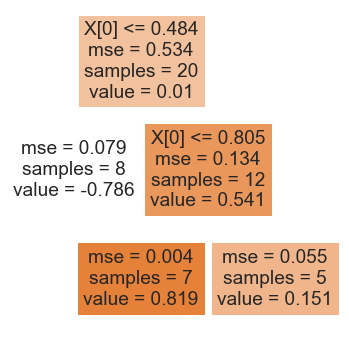

In [9]:
plt.figure().set_size_inches(6, 6)

tree.plot_tree(dtree, filled=True);

## Decision Tree model using Wine Quality data

In [10]:
df_wine = pd.read_csv(r'../data/winequality.csv', index_col=0)

# select the columns to be used as predictors in the model
num_cols = df_wine.columns[df_wine.dtypes == 'float64']

num_cols

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [11]:
# model training data
X = df_wine[num_cols]
y = df_wine.quality

# define the model object
dtree = tree.DecisionTreeRegressor(max_depth=5, random_state=314)

# fit the model
dtree_wine = dtree.fit(X, y)

# make predictions
df_wine['preds'] = dtree_wine.predict(X)

df_wine[['preds', 'quality']].head()

,preds,quality
0,5.532751,6
1,5.532751,6
2,5.869565,6
3,5.802432,6
4,5.802432,6


Mean Squared Error (MSE)

In [12]:
from sklearn.metrics import mean_squared_error

mse_wine = mean_squared_error(df_wine.quality, df_wine.preds)

mse_wine

0.4910990241269476

What happens if we build a model with the default settings...

In [13]:
dtree = tree.DecisionTreeRegressor(random_state=314)

dtree_wine = dtree.fit(df_wine[num_cols], df_wine.quality)

df_wine['preds'] = dtree_wine.predict(df_wine[num_cols])

mean_squared_error(df_wine.quality, df_wine.preds)

0.0

In [14]:
df_wine[['quality', 'preds']].head()

,quality,preds
0,6,6.0
1,6,6.0
2,6,6.0
3,6,6.0
4,6,6.0


In [15]:
dtree.get_depth()

27

This is an example of over-fitting. Decision Tree is a _greedy_ algorithm, prone to over-fitting.

## *Exercise: Decision Tree model using House Prices data* 
[Data Source](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

Step 1: Read data.

In [16]:
df_house = pd.read_csv(r'../data/house_prices.csv', index_col=0)

df_house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Step 2: Define `X` and `y` using the columns specified below.

In [17]:
cols_to_use = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 
               'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 
               'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 
               'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
               'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
               '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold',
               'YrSold']

target_col = 'SalePrice'

In [18]:
X = df_house[cols_to_use]

y = df_house['SalePrice']

X.shape, y.shape

((1460, 25), (1460,))

Step 3: Define a Decision Tree model object. Use `max_depth=5`.

In [19]:
dtree = tree.DecisionTreeRegressor(max_depth=5, random_state=314)

Step 4: Train (fit) the model using `X` and `y`.

In [20]:
dtree_house = dtree.fit(X, y)

Step 5: Make predictions using the same (training) dataset `X`.

In [21]:
df_house['preds'] = dtree_house.predict(X)

Step 6: Find the correction between the predicted values and the actual target values.

In [22]:
df_house.preds.corr(df_house.SalePrice)

0.9250131531671375

Step 7: Calculate MSE.

In [23]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df_house.SalePrice, df_house.preds)

mse

910389135.5666152

How does MSE compare to the mean value of the target?

In [24]:
mean = df_house.SalePrice.mean()

mean

180921.19589041095

In [25]:
mse**0.5 / mean

0.1667723634001809

### Feature Importance

In [32]:
importances = dtree_house.feature_importances_

importances[:10]

array([0.        , 0.00720944, 0.75710273, 0.        , 0.00564202,
       0.0064926 , 0.0592356 , 0.04229075, 0.        , 0.11134039])

In [31]:
indices = np.argsort(importances)[::-1]

indices[:5]

array([2, 9, 6, 7, 1], dtype=int64)

In [36]:
X.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [45]:
# print the feature ranking
for f in range(X.shape[1]):
    imp = importances[indices[f]]
    col = X.columns[indices[f]]
    if imp > 0:
        print(f'{f+1}. feature {col} ({imp:.3f})')

1. feature OverallQual (0.757)
2. feature GrLivArea (0.111)
3. feature 1stFlrSF (0.059)
4. feature 2ndFlrSF (0.042)
5. feature LotArea (0.007)
6. feature Fireplaces (0.007)
7. feature YearRemodAdd (0.006)
8. feature YearBuilt (0.006)
9. feature 3SsnPorch (0.004)
10. feature WoodDeckSF (0.000)
